# Our Data
In this notebook, I show the data we use for the project. The data is available to us in [Dropbox](https://www.dropbox.com/scl/fo/ujlvwjenrugdnzusxb04p/AJY7nvba6xihgvzd0bjwCRk?rlkey=woyb4gojtiqhvazd6lablbj4g&st=gd1buut9&dl=0) (This was the link we used last summer, we'll likely keep using it, but that's why it's named "2024") and is from [Dimensions AI](https://www.dimensions.ai) as of 2021. In general, all fields are separated following the [ANZSRC standard](https://www.abs.gov.au/statistics/classifications/australian-and-new-zealand-standard-research-classification-anzsrc/latest-release), and we work with them one at a time. The parent folder in Dropbox has three folders in it:
1. **notebooks:** This has a bunch of example notebooks for various things. You can look through these if you want. If you're unfamiliar with networks, I especially suggest looking at the "crash_courses/networks" folder.
2. **msi_demo:** Don't worry about this right now. We'll look at it later.
3. **data:** Where the data is stored. This is what I'll focus on now.

One extra thing I'll add now (since I don't know where else to put it) is that you don't need to download the data. Instead, you can copy a link to the file and use that. For example, a link from dropbox to one of the files is:

https://www.dropbox.com/scl/fi/a1t16rtialcw03n50ffkc/concepts_Zoology_608.csv.gz?rlkey=vjv60sfbhofbgvzfzdkrlurl1&st=eol4x1dm&dl=0

To use it in Python, you change the "dl=0" at the end to "dl=1" which makes it automatically download when you hit the link and use the link as the file path. If it's compressed, you'll need to manually enter the compression information. For example, you can use:
```
pd.read_csv('https://www.dropbox.com/...&dl=1', compression='gzip')
```

## Config

In [2]:
# load some packages
from matplotlib.text import Text
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

/Users/floyd/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Disruption Data
The **disruption_data_from_tom** folder has information on the importance of all papers in the dataset. It's big (almost 5gb as a parquet), but contains a lot of info.

Each article has an ID that matches the ID in the other data and various statistics. Statistics each have a letter and number. The letter signifies what is is. For example:

* `b`: Backward citations. The number of articles that paper cites.
* `i`: Forward citations. The number of articles that cite that paper.
* `cd`: The CD index from [Funk and Owen-Smith (2016)](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2015.2366). A scale from -1 to 1. A value of -1 means a paper is consolidating, meaning it combines ideas from many other papers. A value of 1 means it's disruptive, meaning it introduces ideas that replace other work.
* `cdnok`: "CD no K". The CD index without a k part. Similarly goes from -1 to 1, just is more likely to be closer to an extreme value.

The number is the number of years that is calculated for. For example, `i10` is the number of citations a paper gets after 10 years. 

# Citation Data
The "dimensions_2021_09_01_pull_20250425" has data on article citations to create a citation network. This is new, so I'm not as familiar with it as the other data, but is part of what we'll be working with this summer.

# Collaboration Network Data
Information to make a collaboration network is available in the "dimensions_2021_09_01_pull_1/collaboration_network_data" folder.

Contains data to make a collaboration network for researchers that have worked together. Each row represents an article and author pair: the `article_id` is the article and the `researcher_id` is the researcher.

We haven't used these yet, but may at some point.

In [3]:
pd.read_csv(
        'https://www.dropbox.com/scl/fi/ccpg44dt73ga24p45a0u3/collaborations_Zoology_608.csv.gz?rlkey=8kr35ztwfztz36qww7v1fr926&st=xcxd6s6d&dl=1',
        compression='gzip',
    )

,article_id,year,researcher_id
0,pub.1100184428,2018.0,ur.07500112735.28
1,pub.1100184428,2018.0,ur.0775274140.76
2,pub.1014429482,2008.0,ur.012645135765.17
3,pub.1014429482,2008.0,ur.016413706041.84
4,pub.1071171019,1994.0,ur.01216432663.31
...,...,...,...
1134648,pub.1028766873,2008.0,ur.0747722674.67
1134649,pub.1063382447,2016.0,ur.01114402740.30
1134650,pub.1063382447,2016.0,ur.01137537003.00
1134651,pub.1063382447,2016.0,ur.0577704134.35


# Articles Data
Data on articles is available in the "dimensions_2021_09_01_pull_1/articles_data" folder. The "applied_mathematics_piloting/dimensions_2021_09_01_articles_category_for_2l_code_102.*" files also contain the same articles data, just for an older pull on just the applied mathematics field (Field 102). 

This contains a lot of information on each article, including its date of publication, year, journal, title, and such. We haven't done much with this either, but it also contains the full abstract text if we wanted to do any NLP concept parsing stuff with it.

In [4]:
pd.read_csv(
        'https://www.dropbox.com/scl/fi/0bsgnsgb1rr1s143cgyd1/articles_Zoology_608.csv.gz?rlkey=emlv5fy52dz0d2rnodygjy9pp&st=kehlrig7&dl=1',
        compression = 'gzip',
    ).columns

/var/folders/v9/_js75nzx64lf8__fmfsscg4c0000gn/T/ipykernel_43954/2360218702.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(


Index(['article_id', 'year', 'date', 'doi', 'volume', 'issue', 'pages',
       'title_preferred', 'abstract_preferred', 'journal_title',
       'citations_count', 'metrics_times_cited', 'metrics_recent_citations',
       'metrics_field_citation_ratio', 'metrics_relative_citation_ratio',
       'altmetrics_score', 'nauthors', 'npatents_citing',
       'ncategory_for_l1_codes', 'ncategory_for_l2_codes',
       'pg_abstract_preferred_lang_code', 'pg_abstract_preferred_lang_conf'],
      dtype='object')

# Concept Data
The concept data is mostly what we'll be working with. It's available in the "dimensions_2021_09_01_pull_1/concept_network_data" folder for different fields and the "applied_mathematics_piloting/articles_category_for_2l_abstracts_concepts_processed_v1_EX_102.csv.gz" file for just the applied mathematics field.

Each row represents a concept that occurs in a specific paper. It has the following columns:

| Column | Meaning |
| --- | --- |
| `article_id` | Unique identifier for each article. Same as the other files to merge on. |
| `year` | Article's year of publication |
| `concept` | The concept that shows up in the article's abstract |
| `relevance_mean` | Each occurrence of a concept has a relevance score between 0 and 1 for how associated it is with the text around it. This is the mean of that score across all occurrences. |
| `concept_freq_in_abstract` | The number of times that concept shows up in the paper's abstract. |
| `concept_no` | The number of concepts before it in that paper's abstract |
| `dfreq_in_category_for_2l` | The number of times that concept shows up in the field |
| `dfreq_in_category_for_2l_year` | The number of times that concept shows up in the field in that year |

We primarily use the first 4.

In [5]:
# load the data
df = pd.read_csv(
        'https://www.dropbox.com/scl/fi/a1t16rtialcw03n50ffkc/concepts_Zoology_608.csv.gz?rlkey=vjv60sfbhofbgvzfzdkrlurl1&st=ciu77f72&dl=1',
        compression='gzip',
    )

df

,article_id,year,concept,relevance_mean,concept_freq_in_abstract,concept_no,dfreq_in_category_for_2l,dfreq_in_category_for_2l_year
0,pub.1050083629,1984,mfvsg,0.0,1,0,2,1
1,pub.1050083629,1984,svsg,0.0,1,1,1,1
2,pub.1091469564,1992,1972 random parasitoid model,0.0,1,0,1,1
3,pub.1117742847,2001,198697 lobster research cruise,0.0,1,0,1,1
4,pub.1043257859,2001,1986–97 lobster research cruise,0.0,1,0,2,2
...,...,...,...,...,...,...,...,...
18064866,pub.1000238039,2015,’s worker population size,0.0,1,40,1,1
18064867,pub.1005449634,2012,’s workforce swarm fraction depart,0.0,1,42,1,1
18064868,pub.1134463678,2021,’s bad crop pest,0.0,1,57,1,1
18064869,pub.1083920773,2017,’s bad invasive,0.0,1,54,1,1


## Filtering
We filter the data for a couple of things. All thresholds can be moved if another one is better, these are just what we're using now.

First, we keep only relevant enough concepts. We have used a relevance threshold of 0.7.

Second, we keep only new enough papers. We start science at 1920, before which there are very few papers.

Third, we want to get rid of concepts that are too rare (likely typos) and too ubiquitous (too vague for use, two things using a "mathematical model," a real concept, doesn't mean there's not a knowledge gap between them). We use concepts that show up in between 0.01% and 0.1% of papers (this is what Adam is working on, so it will definitely change).

In [6]:
# config
MIN_RELEVANCE = 0.7
MIN_YEAR = 1920
MAX_YEAR = 2021  # when the data is from
MIN_CONCEPT_FREQ = 0.0001
MAX_CONCEPT_FREQ = 0.001

# relevance filtering
df = df[df['relevance_mean'] >= MIN_RELEVANCE]

# year filtering
df = df[df['year'] >= MIN_YEAR]

# counts
num_articles = df['article_id'].nunique()
concept_freq = df.groupby('concept').transform('size') / num_articles
df = df[(concept_freq >= MIN_CONCEPT_FREQ) & (concept_freq <= MAX_CONCEPT_FREQ)]

# remove columns we dont care about
df = df[['article_id', 'concept', 'year']]

df

,article_id,concept,year
18622,pub.1039451177,akh receptor,2002
18623,pub.1129686695,akh receptor,2020
18624,pub.1007326462,akh receptor,2006
18625,pub.1101015253,akh receptor,2018
49772,pub.1092160858,acromyrmex leaf cut ant,2017
...,...,...,...
18063221,pub.1010904311,γδ t cell,2012
18063223,pub.1039368032,γδ t cell,2014
18063225,pub.1120146611,γδ t cell,2019
18063226,pub.1040144066,γδ t cell,2012


## Network Nodes
Concepts are nodes in the network. Each concept has a weight, which comes from the normalized year the concept initially is published in. We normalize using
$$
    n_i = \frac{y_i - y_{\min}}{y_{\max} - y_{\max}}.
$$

In [30]:
# get the last publication
concepts_first = (
    df
        .sort_values('year')
        .drop_duplicates(subset='concept', keep='first')#keep fisrt
        .reset_index(drop=True)
)
concepts = (
    df
        .sort_values('year')
        .drop_duplicates(subset='concept', keep='last')  #keep last
        .reset_index(drop=True)
)

# normalize the year
concepts_first['norm_year'] = (concepts_first['year'] - MIN_YEAR) / (MAX_YEAR - MIN_YEAR)
#concepts['last_norm_year'] = (concepts['year'] - MIN_YEAR) / (MAX_YEAR - MIN_YEAR)
concepts['norm_year'] = (concepts['year'] - MIN_YEAR) / (MAX_YEAR - MIN_YEAR)

print(concepts_first)
print(concepts)

          article_id                        concept  year  norm_year
0     pub.1070547478                      land bird  1920   0.000000
1     pub.1005636163                     fruit tree  1921   0.009901
2     pub.1070548561                american museum  1922   0.019802
3     pub.1070548072              bird conservation  1922   0.019802
4     pub.1054807332        ministry of agriculture  1923   0.029703
...              ...                            ...   ...        ...
4141  pub.1122800167    free plain language summary  2019   0.980198
4142  pub.1112852989  sustainable development goals  2019   0.980198
4143  pub.1125125078     invasive non native specie  2020   0.990099
4144  pub.1131427185               student learning  2020   0.990099
4145  pub.1125090234    hermetic storage technology  2020   0.990099

[4146 rows x 4 columns]
          article_id                    concept  year  norm_year
0     pub.1050740824          museum expedition  1935   0.148515
1     pub.1050740

In [31]:
first = concepts_first.set_index('concept')
last = concepts_last.set_index('concept')

# merge to lifespan
concept_span = pd.DataFrame({
    'first_year': first['year'],
    'last_year': last['year']
})

concept_span['lifespan'] = concept_span['last_year'] - concept_span['first_year']

concept_span['first_norm'] = first['norm_year']
concept_span['last_norm'] = last['norm_year']

#sorting
concept_span_sorted = concept_span.sort_values(by='lifespan', ascending=True)

#print
concept_span_sorted

,first_year,last_year,lifespan,first_norm,last_norm
concept,,,,,
solid state nmr,2018,2018,0,0.970297,0.970297
vertebrate characteristic,2009,2009,0,0.881188,0.881188
virescens larvae,2008,2008,0,0.871287,0.871287
south east atlantic ocean,2006,2006,0,0.851485,0.851485
true vertebrate characteristic,2009,2009,0,0.881188,0.881188
...,...,...,...,...,...
field crop,1923,2020,97,0.029703,0.990099
wild mammal,1924,2021,97,0.039604,1.000000
bird conservation,1922,2020,98,0.019802,0.990099


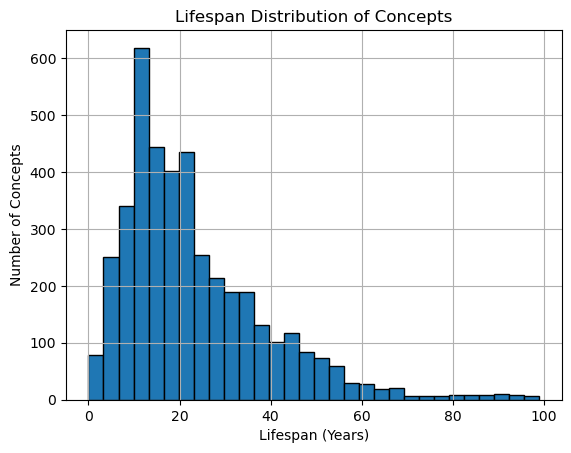

In [ ]:
plt.hist(concept_span['lifespan'], bins=30, edgecolor='black')
plt.title('Lifespan Distribution of Concepts')
plt.xlabel('Lifespan (Years)')
plt.ylabel('Number of Concepts')
plt.grid(True)
plt.show()


## Network Edges
Get the edges of the network by merging the dataframe in on itself. Then, we again keep only the first occurrence and normalize the year.

In [32]:
concept_last_year = (
    df.sort_values('year')
      .drop_duplicates(subset='concept', keep='last')
      .set_index('concept')[['year']]
      .rename(columns={'year': 'last_year'})
)

edges = df.merge(df, on='article_id', suffixes=['_source', '_target'])
edges = edges[edges['concept_source'] < edges['concept_target']]

edges = edges[['concept_source', 'concept_target']].drop_duplicates().copy()

edges = edges.merge(concept_last_year, left_on='concept_source', right_index=True)
edges = edges.rename(columns={'last_year': 'last_year_source'})
edges = edges.merge(concept_last_year, left_on='concept_target', right_index=True)
edges = edges.rename(columns={'last_year': 'last_year_target'})

edges['last_year'] = edges[['last_year_source', 'last_year_target']].max(axis=1)

edges['norm_year'] = (edges['last_year'] - MIN_YEAR) / (MAX_YEAR - MIN_YEAR)

edges = edges[['concept_source', 'concept_target', 'last_year', 'norm_year']]

edges

,concept_source,concept_target,last_year,norm_year
6,acromyrmex leaf cut ant,developmental stage,2021,1.000000
9,acromyrmex leaf cut ant,caste specific expression,2018,0.970297
10,acromyrmex leaf cut ant,colony level selection,2017,0.960396
11,acromyrmex leaf cut ant,genetic variation,2020,0.990099
12,acromyrmex leaf cut ant,social insect caste,2019,0.980198
...,...,...,...,...
86601,wood bore beetle,wood bore insect,2021,1.000000
86656,worker bee,worker larvae,2021,1.000000
86776,worker reproduction,young larvae,2021,1.000000
86803,worker reproduction,worker sterility,2021,1.000000


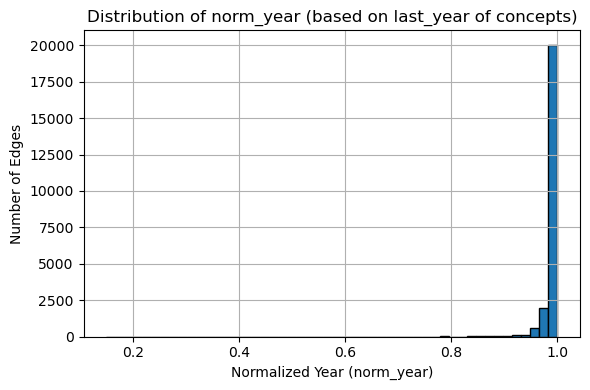

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(edges['norm_year'], bins=50, edgecolor='black')
plt.title('Distribution of norm_year (based on last_year of concepts)')
plt.xlabel('Normalized Year (norm_year)')
plt.ylabel('Number of Edges')
plt.grid(True)
plt.tight_layout()
plt.show()

## Knowledge Network
Make the network using the dataframes.

There are other ways to do this (Networkx can make a network from a pandas edgelist or we could make a bipartite article-concept network and wrap it in on itself), but this is fastest in my experience without losing isolate nodes.

In [33]:
# initialize the graph
G = nx.Graph()

# add the nodes
G.add_nodes_from([(c, {'weight': ny}) for c, ny in zip(concepts['concept'], concepts['norm_year'])])


# add the edges
G.add_edges_from([(u, v, {'weight': ny}) for u, v, ny in zip(edges['concept_source'], edges['concept_target'], edges['norm_year'])])

G

In [34]:
adj = nx.adjacency_matrix(G, weight='weight')

## Next Steps
Next, you can plug the network into the homology pipeline and calculate persistence. You could also do any other network analysis on it (centrality, communities, etc.).

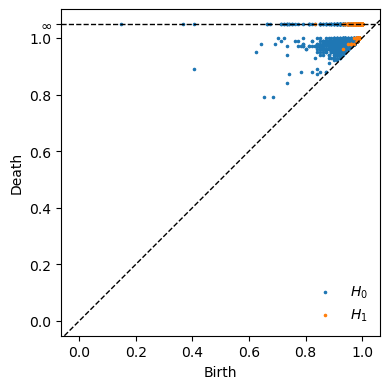

In [35]:
import oat_python as oat

# adjacency matrix
adj = nx.adjacency_matrix(G)
adj.setdiag([d['weight'] for _, d in G.nodes(data=True)])
adj = adj.sorted_indices()

# oat calculation
factored = oat.rust.FactoredBoundaryMatrixVr(adj, 1)
homology = factored.homology(False, False)

# initialize the plot
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
infty = 1.05
ax.set_xlabel('Birth')
ax.set_ylabel('Death')
ax.axis('equal')

# lines
ax.axhline(infty, ls='--', c='k', lw=1)
ax.axline([0, 0], [1, 1], ls='--', c='k', lw=1)

# loop, plot homology
for dim in homology['dimension'].unique():
    dim_bc = homology[homology['dimension'] == dim]
    ax.scatter(dim_bc['birth'], dim_bc['death'].replace(np.inf, infty), s=2.5, label=f'$H_{dim}$')

# final formatting
ticks = ax.get_yticklabels()[1:-1]
ticks.append(Text(0, infty, r'$\infty$'))  # add infty label
ax.set_yticks(np.hstack((ax.get_yticks()[1:-1], infty)))
ax.set_yticklabels(ticks)
ax.legend(frameon=False)
fig.tight_layout()
handles = ax.get_legend_handles_labels()